You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Your task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

You should submit a Jupyter Notebook which holds the code for questions 1 and 2, and you can use Markdown cells for questions 3 and 4.

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN 6110\experiment_dataset.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [11]:
df.head(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


Question 1

In [19]:
df2 = df.groupby(by = 'Variant')['Time Spent'].sum()
varA = df2['Variant A'] - df2['Control']
varB = df2['Variant B'] - df2['Control']
print('Variant A lift in Time Spent: ', varA) 
print('Variant B lift in Time Spent: ', varB) 

Variant A lift in Time Spent:  1361.7650937699673
Variant B lift in Time Spent:  879.3828393472804


<Axes: xlabel='Variant', ylabel='Time Spent'>

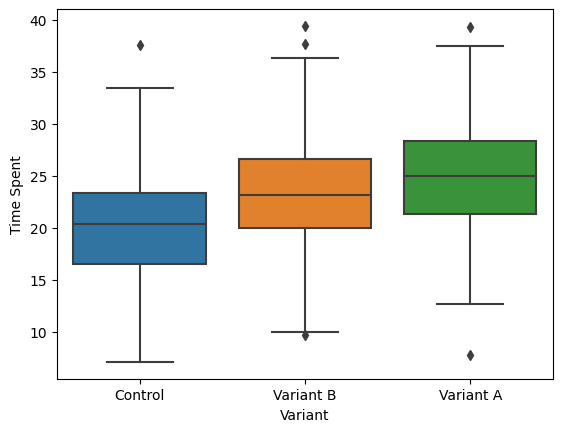

In [13]:
sns.boxplot(data = df, x = 'Variant', y = 'Time Spent') 

In [14]:
df2 = df.groupby(by = 'Variant')['CTR'].sum()
varA = df2['Variant A'] - df2['Control']
varB = df2['Variant B'] - df2['Control']
print('Variant A lift in CTR: ', varA) 
print('Variant B lift in CTR: ', varB) 

Variant A lift in CTR:  6.180520716900553
Variant B lift in CTR:  2.439491210528942


<Axes: xlabel='Variant', ylabel='CTR'>

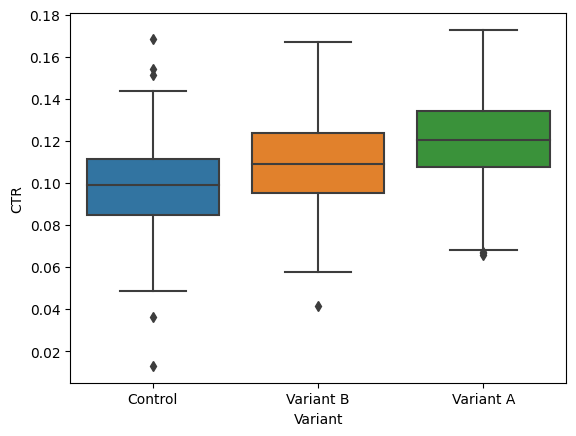

In [15]:
sns.boxplot(data = df, x = 'Variant', y = 'CTR') 

Question 2

In [16]:
df_varB = df[df['Variant'] == 'Variant B']
df_varA = df[df['Variant'] == 'Variant A']
df_Control = df[df['Variant'] == 'Control']

In [17]:
print("Variant B:", stats.ttest_ind(df_Control['Time Spent'], df_varB['Time Spent']))
print("Variant A:", stats.ttest_ind(df_Control['Time Spent'], df_varA['Time Spent']))

Variant B: Ttest_indResult(statistic=-8.174237395991806, pvalue=1.496358076285182e-15)
Variant A: Ttest_indResult(statistic=-12.142363487472364, pvalue=8.488565644996449e-31)


In [18]:
print("Variant B:", stats.ttest_ind(df_Control['CTR'], df_varB['CTR']))
print("Variant A:", stats.ttest_ind(df_Control['CTR'], df_varA['CTR']))

Variant B: Ttest_indResult(statistic=-6.4718143491783255, pvalue=1.8743198199982106e-10)
Variant A: Ttest_indResult(statistic=-13.829424737499187, pvalue=1.9602781373243157e-38)


3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

    When looking through the analysis it is clear that both variants perform better in both time spent and in their click through rate. 

    When looking at the lift in Time Spent and Click through rate there is clear improvement. When using the sum of the click through rates the difference between Variant A and the control is 1362 and Variant B and the control is 879. When looking at the mean of the two groups through the boxplot, there is a clear rise in the mean when going from the control to Variant B then another increase when going from Variant B to Variant A. Bariant A does experience the larger lift in time spent out of the two variants. Next, when looking at the lift in click through rate for both variants there is also a large increase. When looking a the sum of the two columns Variant has a lift of 6.18 and Vairant B has a lift of 2.44. Once again, as shown in the boxplot, when looking at the mean there is also a significant risk from the control to Variant B and once again, Variant A has the highest mean value.

    When looking at the t-test value and the p value there is an obvious significant difference between the variant and the control. In both cases the p value is well below 0.05 meaning we accept the null hypothesis that both variants would improve the Time Spent and Click Through Rate for the mobile application. 

    My recommendation to the engineering team would be to deploy Variant A. Variant A, as stated above, has the most impact in the Time spent and CTR. Both variants are a clear improvement over the current feature but Variant A would be the most impactful.  

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

    To begin with the rollout plan of Variant A to the mobile application, I would create a timeline for the rollout proccess. Without having much detail I would ensure that the timeline reflected the required amount of time to prepare the new variant and ensure that it can be safely and properly deployed to the mobile application. I would then analyse what resources I have and determine how quickly this variant could be brought to market. Once all of these stages are done and the variant can be rolled out, I would develope a plan to communicate with customers the advantages and possible changes that come as a part of this new feature. Once the feature has been rolled out successfully begin to analyse it and collect consumer feedback to improve going forward. Take this advice and use it to help improve the time spent on the application and the click through rate going forward in new variants of the feature. 